# ROMS (Regional Ocean Modeling System)
### Efficiently tracking particles in a ROMS simulation

Task 1: Reach out and open files that are on the internet

In [1]:
# imports
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr

#load map packages
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.crs as ccrs

# plot inline
%matplotlib inline

In [2]:
# open dataset
ds = xr.open_dataset('https://oceanmodeling.ucsc.edu:8443/thredds/dodsC/ccsra_2016a_phys_agg_zlevs/fmrc/CCSRA_2016a_Phys_ROMS_z-level_(depth)_Aggregation_best.ncd')

Task 2: Determine within which grid cell a point/particle falls

In [21]:
# calculate speed
def calcSpeed(u, v):
    return np.sqrt((np.abs(u**2) + np.abs(v**2)))

speed = calcSpeed(ds['u'][0][0][0], ds['v'][0][0][0])

<xarray.DataArray (xi_u: 185, xi_v: 186)>
array([[0.10566004, 0.11387216, 0.10255184, ...,        nan,        nan,
               nan],
       [0.1047285 , 0.11300834, 0.10159181, ...,        nan,        nan,
               nan],
       [0.10386631, 0.1122098 , 0.10070277, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    lat_u     (xi_u) float64 30.0 30.0 30.0 30.0 30.0 ... 30.0 30.0 30.0 30.0
    lon_u     (xi_u) float64 -133.9 -133.9 -133.8 ... -115.8 -115.7 -115.5
    z         float64 -250.0
    time      datetime64[ns] 2011-01-02
    time_run  datetime64[ns] 2011-01-02
    lat_v     (xi_v) float64 30.05 30.05 30.05 30.05 ... 30.05 30.05 30.05 30.05
    lon_v     (xi_v) float64 -134.0 -133.9 -133.8 ... -115.7 -115.6 -115.5
Dimensions without coordinates: xi_u, xi_v

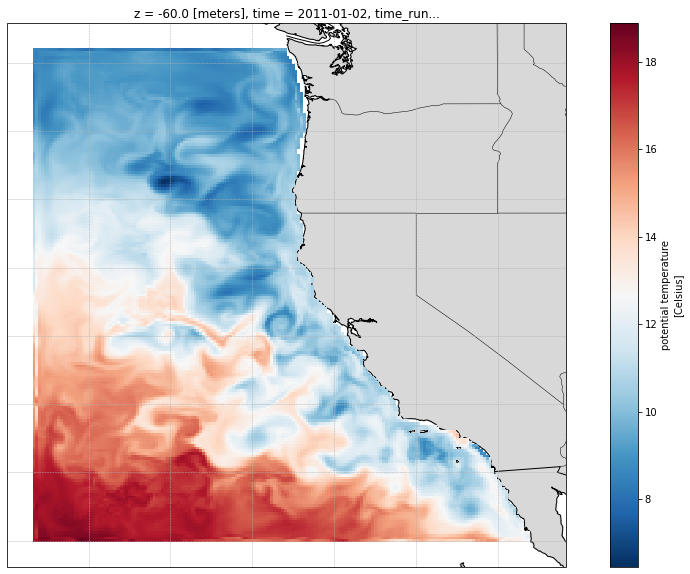

In [31]:
fig = plt.figure(figsize=(16,10), dpi = 72)
ax = plt.axes(projection=ccrs.PlateCarree())

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.coastlines(resolution='10m',linewidth=1,color='black')
ax.add_feature(cfeature.LAND, color='grey', alpha=0.3)
ax.add_feature(states_provinces, linewidth = 0.5)
ax.add_feature(cfeature.BORDERS, color = 'black')
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.gridlines(linestyle = '--', linewidth = 0.5)

#plot diff data
plt.title("Seabird Observation Locations")

ds.temp.isel(z=5, time=0).plot(x="lon_rho", y="lat_rho", cmap="RdBu_r")

plt.show()

In [2]:
# plot temp, currents, where it's moving for each point
# a series of plots or maybe a gif of plots
# runge kutta or, if too hard, use modified euler